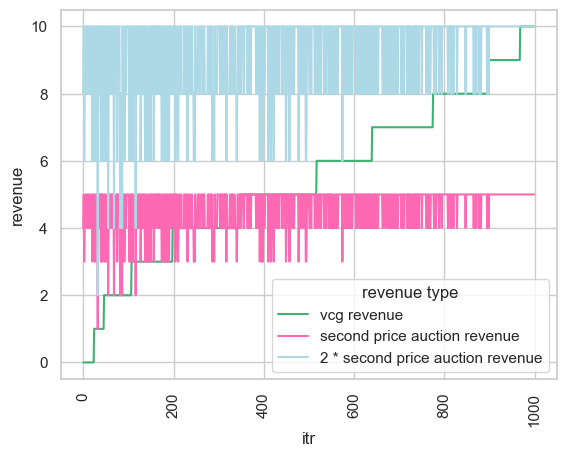

In [20]:
from copy import deepcopy
import random
from alias_attack import generate_bidders
from constants import items
from vcg import VCG
from second_price_auction import second_price_auction
import seaborn as sns
import matplotlib.pyplot as plt
import json

revenue = []

for _ in range(1000):
    num_bidders = random.randint(5, 10)
    random_bidders = generate_bidders(items, num_bidders)
    
    vcg_revenue = VCG(items, random_bidders).auctioner_revenue
    winner_1, price_1 = second_price_auction(random_bidders)
    
    revenue.append((vcg_revenue, price_1))
    
    original_value = random_bidders[winner_1[0]][winner_1[1]]['value']
    random_bidders[winner_1[0]][winner_1[1]]['value'] = random.randint(1, 5)
    
    winner_2, price_2 = second_price_auction(random_bidders)
    
    if winner_1 == winner_2 and price_2 < price_1:
        print("Reporting truthfully is not a dominant strategy")
        break

revenue.sort(key=lambda x: x[0])
vcg_revenue = [i[0] for i in revenue]
second_price_revenue = [i[1] for i in revenue]
two_second_price_revenue = [2 * i[1] for i in revenue]

sns.set(style="whitegrid")
sns.lineplot(data=vcg_revenue, label='vcg revenue', color='mediumseagreen')
sns.lineplot(data=second_price_revenue, label='second price auction revenue', color='hotpink')
sns.lineplot(data=two_second_price_revenue, label='2 * second price auction revenue', color='lightblue')
plt.xticks(rotation=90)
plt.xlabel('itr')
plt.ylabel('revenue')
plt.legend(title='revenue type')
plt.show()
